

```
Ridge Regression is a type of regularized linear regression that helps prevent overfitting by penalizing large coefficients.

```





$$
\min_{\beta} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [9]:
data = load_diabetes()

In [11]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## **Without using Ridge Regularisation**

In [12]:
X = data.data
y = data.target

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

L.fit(X_train, y_train)
y_pred = L.predict(X_test)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
print("r2 Score: ", r2_score(y_test, y_pred))
print("MSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2 Score:  0.4526027629719195
MSE:  53.85344583676593


## **Using Ridge Regularisation**

In [38]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.1)

R.fit(X_train, y_train)
y_pred1 = R.predict(X_test)

> **r2 Score improved a bit !**

In [39]:
print("r2 score: ", r2_score(y_test, y_pred1))
print("MSE: ", np.sqrt(mean_squared_error(y_test, y_pred1)))

r2 score:  0.46085219464119265
MSE:  53.446111997699646


### Generating a sample dataset

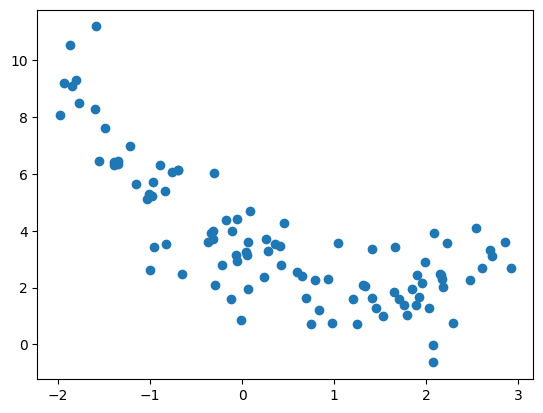

In [22]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

### **Comparing effect of different alpha values on Overfitting**

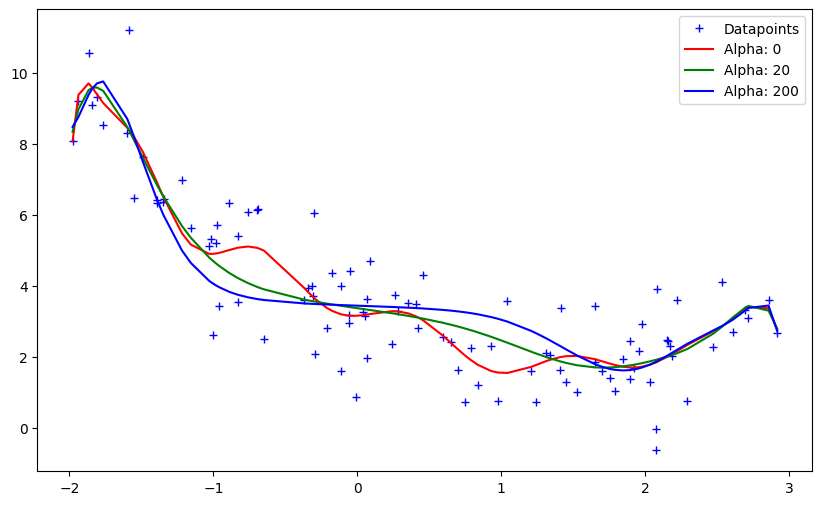

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

> alpha=0 ---> overfitted

> alpha=20 ---> best fit

> alpha=200 ---> underfitted